# 1. Imports e conexão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configuração igual ao src/config.py
DB_CONFIG = {
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': '5432',
    'dbname': 'iqvia_clamed'
}
connection_str = f"postgresql+psycopg2://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"
engine = create_engine(connection_str)

print("Conexão estabelecida.")

Conexão estabelecida.


# 2: Consulta SQL (SELECT)

In [2]:
query = """
SELECT 
    brick,
    ean,
    vol_clamed_pp,
    vol_total_mercado,
    participacao_clamed
FROM fact_vendas_iqvia
LIMIT 100;
"""
df_analise = pd.read_sql(query, engine)
display(df_analise.head())

,brick,ean,vol_clamed_pp,vol_total_mercado,participacao_clamed
0,1147 - CAMPO GRANDE - CENTRO,32689150,5,5,1.000000
1,1147 - CAMPO GRANDE - CENTRO,42110200,5,12,0.416667
2,1147 - CAMPO GRANDE - CENTRO,42176763,0,4,0.000000
3,1147 - CAMPO GRANDE - CENTRO,42277217,23,115,0.200000
4,1147 - CAMPO GRANDE - CENTRO,42355014,1,3,0.333333


# 3. Gráfico de Barras - Comparativo Volume

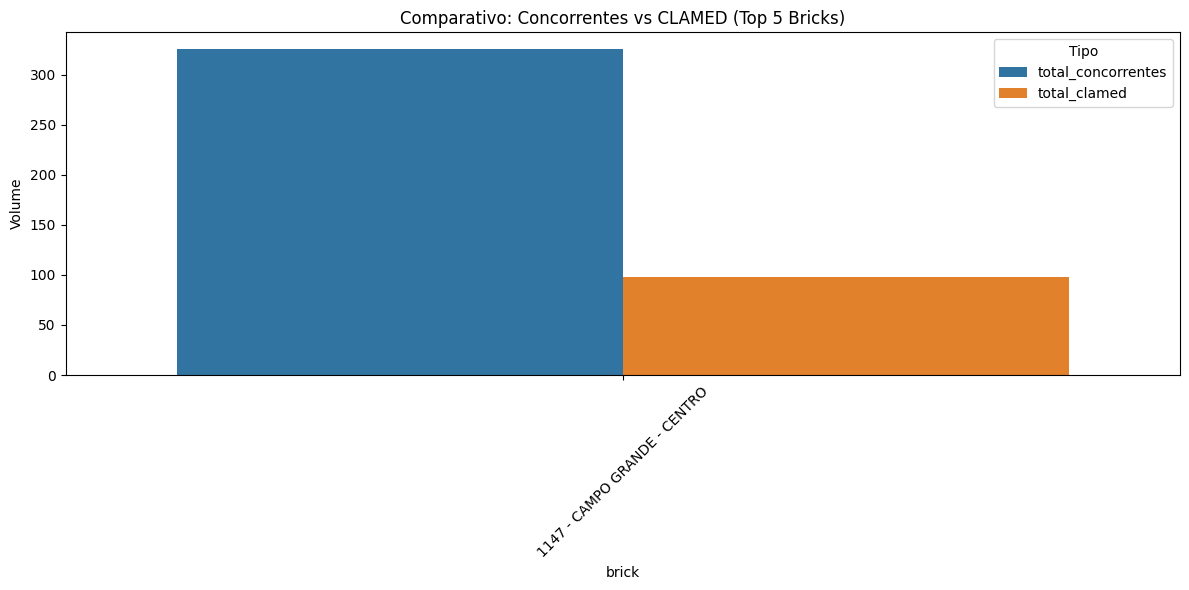

In [ ]:
# Agregando por Brick
query_brick = """SELECT
    brick,
    SUM(vol_concorrente_indep + vol_concorrente_rede) as total_concorrentes,
    SUM(vol_clamed_pp) as total_clamed
FROM fact_vendas_iqvia
GROUP BY brick
ORDER BY total_clamed DESC
LIMIT 5;
"""

df_brick = pd.read_sql(query_brick, engine)

# Plotagem
df_melted = df_brick.melt(id_vars='brick', var_name='Tipo', value_name='Volume')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='brick', y='Volume', hue='Tipo')
plt.title('Comparativo: Concorrentes vs CLAMED (Top 5 Bricks)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Histograma - Distribuição de vendas de um produto

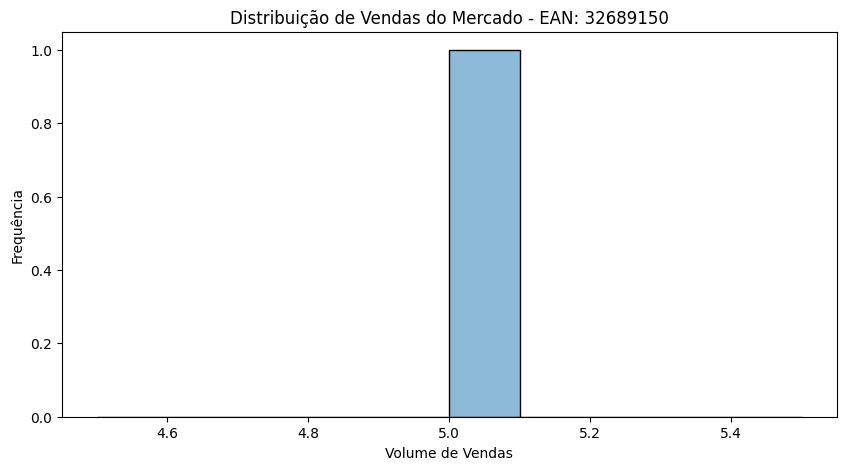

In [ ]:
# Escolhendo um EAN específico
ean_exemplo = df_analise['ean'].iloc[0] 

query_hist = f"""
SELECT vol_total_mercado 
FROM fact_vendas_iqvia 
WHERE ean = '{ean_exemplo}'
"""
df_hist = pd.read_sql(query_hist, engine)

plt.figure(figsize=(10, 5))
sns.histplot(df_hist['vol_total_mercado'], bins=10, kde=True)
plt.title(f'Distribuição de Vendas do Mercado - EAN: {ean_exemplo}')
plt.xlabel('Volume de Vendas')
plt.ylabel('Frequência')
plt.show()